In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

dataToLoad = "ghUTF8.csv"

grubhubDirty = pd.read_csv(dataToLoad, encoding='utf8')

In [2]:
grubhubDirty.head(3)

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,acceptedAt,streetName,city,zip,canceled,popUp,type,lat,long,rating
0,1,7/2/2021,Shere E Punjab,11.14,3.18,7.96,3.55,2.53,11.00,1.88,11:31:00 AM,"""3319 301 Byers Dr #15""",Glen Mills,19342,0,0,Indian,39.88499,-75.52817,4.0
1,2,7/4/2021,McDonald's,11.34,3.99,7.35,2.51,1.60,6.96,3.24,12:43:00 PM,1 Christy Dr,Concordville,19331,0,0,Fast Food,39.88220,-75.54521,1.5
2,3,6/27/2021,Tsunami,11.83,5.43,6.40,3.58,1.82,7.91,1.00,4:22:00 PM,10 Market St,West Chester,19382,0,0,Asian,39.95963,-75.60473,4.0


In [3]:
# Getting later grouped by out of the way
groupedByEstablishment = grubhubDirty.groupby(['streetName', 'establishment'])
groupedMeanDF = groupedByEstablishment.mean()
groupedMeanDF.head()

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating
streetName,establishment,,,,,,,,,,,,,,
"""3319 301 Byers Dr #15""",Shere E Punjab,1.0,11.14,3.180,7.960,3.55,2.530,11.00,1.880,19342.0,0.0,0.0,39.88499,-75.52817,4.0
1 Christy Dr,McDonald's,2.0,11.34,3.990,7.350,2.51,1.600,6.96,3.240,19331.0,0.0,0.0,39.88220,-75.54521,1.5
10 Market St,Tsunami,3.0,11.83,5.430,6.400,3.58,1.820,7.91,1.000,19382.0,0.0,0.0,39.95963,-75.60473,4.0
101 Turner Ln,Chipotle,6.0,11.03,6.222,4.808,3.41,1.346,5.85,0.052,19380.0,0.0,0.0,39.96945,-75.58764,2.0
104 Pottstown Pike,KFC,9.0,11.19,4.960,6.230,3.15,2.080,9.04,1.000,19341.0,0.0,0.0,40.02895,-75.62947,1.5


# Quick Transformations

In [4]:
ordersPerEstablishment = groupedByEstablishment["tip"].count()
ordersPerEstablishment.rename("ordersFromEstablishment")
ordersPerEstablishmentDF = pd.merge(grubhubDirty, ordersPerEstablishment, how = "inner", on = "streetName")
ordersPerEstablishmentDF = ordersPerEstablishmentDF.rename(columns = {'tip_x': 'tip', 'tip_y': 'aggOrders'})
grubhubClean = ordersPerEstablishmentDF
#grubhubClean.head(3)

In [5]:
groupedByEstablishment = grubhubClean.groupby(['streetName', 'establishment'])
groupedMeanDF = groupedByEstablishment.mean()
groupedMeanDF.head()

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
"""3319 301 Byers Dr #15""",Shere E Punjab,1.0,11.14,3.180,7.960,3.55,2.530,11.00,1.880,19342.0,0.0,0.0,39.88499,-75.52817,4.0,1.0
1 Christy Dr,McDonald's,2.0,11.34,3.990,7.350,2.51,1.600,6.96,3.240,19331.0,0.0,0.0,39.88220,-75.54521,1.5,1.0
10 Market St,Tsunami,3.0,11.83,5.430,6.400,3.58,1.820,7.91,1.000,19382.0,0.0,0.0,39.95963,-75.60473,4.0,1.0
101 Turner Ln,Chipotle,6.0,11.03,6.222,4.808,3.41,1.346,5.85,0.052,19380.0,0.0,0.0,39.96945,-75.58764,2.0,5.0
104 Pottstown Pike,KFC,9.0,11.19,4.960,6.230,3.15,2.080,9.04,1.000,19341.0,0.0,0.0,40.02895,-75.62947,1.5,1.0


# Summary Tables

In [6]:
totalEstablishments = len(grubhubClean["streetName"].unique())
totalOrders = len(grubhubDirty)
totalMiles = grubhubClean["miles"].sum()
totalMilePay = grubhubClean["mileagePay"].sum()
totalTimePay = grubhubClean["timePay"].sum()
totalBonusPay = grubhubClean["bonus"].sum()
totalTips = grubhubClean["tip"].sum()
totalPay = grubhubClean["total"].sum()
grubhubShare = totalPay - totalTips

In [7]:
basicSummaryDF = pd.DataFrame({
    
    "Total Establishments": [totalEstablishments],
    "Total Orders": [totalOrders],
    "Total Miles": [totalMiles],
    "Total Pay": [totalPay],
    "Total Tips": [totalTips],
    "GrubHub Share": [grubhubShare],
    "Total Mile Pay": [totalMilePay],
    "Total Time Pay": [totalTimePay],
    "Total Bonus": [totalBonusPay]
    
})

basicSummaryDF

,Total Establishments,Total Orders,Total Miles,Total Pay,Total Tips,GrubHub Share,Total Mile Pay,Total Time Pay,Total Bonus
0,84,222,1176.89,2467.65,1331.81,1135.84,271.78,756.33,102.66


In [8]:
timePayPerOrder = totalTimePay/totalOrders
milesPerOrder = totalMiles/totalOrders
payPerMile = totalMilePay/totalMiles
bonusPerOrder = totalBonusPay/totalEstablishments
averageTip = grubhubClean["tip"].mean()
averageOrderTotal = totalPay/totalOrders
grubhubAverage = averageOrderTotal - averageTip
milePayPerOrder = totalMilePay/totalOrders
timePayPerOrder = grubhubClean["timePay"].mean()

In [9]:
relativeSummaryDF = pd.DataFrame({
    
    "Average Total Pay per Order": [averageOrderTotal],
    "Average Tip": [averageTip],
    "GrubHub Average": [grubhubAverage],
    "Miles Per Order": [milesPerOrder],
    "Pay Per Mile": [payPerMile],
    "Mile Pay Per Order": [milePayPerOrder],
    "Time Pay Per Order": [timePayPerOrder],
    "Bonus Per Order": [bonusPerOrder]    
    
})
relativeSummaryDF

,Average Total Pay per Order,Average Tip,GrubHub Average,Miles Per Order,Pay Per Mile,Mile Pay Per Order,Time Pay Per Order,Bonus Per Order
0,11.115541,5.348635,5.766906,5.301306,0.230931,1.224234,3.03747,1.222143


# 1. Frequency Analysis

In [10]:
frequentOrders = groupedMeanDF.loc[groupedMeanDF["aggOrders"] >= 10]
frequentOrders

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
929 S High St STE 21,Country Bagel,217.5,7.005,3.685,3.32,2.722,0.598,2.53,0.0,19382.0,0.0,0.0,39.9427,-75.58937,3.5,10.0


In [11]:
occasionalOrders = groupedMeanDF[(groupedMeanDF["aggOrders"] >= 5) & (groupedMeanDF["aggOrders"] < 10)]
occasionalOrders.head()

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
101 Turner Ln,Chipotle,6.0,11.030000,6.222000,4.808000,3.410000,1.346000,5.850000,0.052000,19380.0,0.0,0.0,39.96945,-75.58764,2.0,5.0
1107 West Chester Pike Space B4,Qdoba,23.0,8.530000,4.305556,4.224444,2.806667,1.032222,4.414444,0.385556,19382.0,0.0,0.0,39.96956,-75.57456,3.0,9.0
1149 West Chester Pike,Primo,39.5,8.433333,4.201667,4.231667,2.995000,0.955000,4.158333,0.281667,19382.0,0.0,0.0,39.97026,-75.56727,3.5,6.0
1233 West Chester Pike,Pica's Restaurant,50.0,13.644000,7.930000,5.714000,3.194000,1.110000,4.826000,1.410000,19382.0,0.0,0.0,39.96878,-75.55725,3.5,5.0
1251 West Chester Pike,China Palace,66.5,10.438750,5.498750,4.940000,3.263750,1.298750,5.646250,0.377500,19382.0,0.0,0.0,39.96876,-75.55584,4.0,8.0


In [12]:
infrequentOrders = groupedMeanDF[(groupedMeanDF["aggOrders"] < 5) & (groupedMeanDF["aggOrders"] > 1)]
infrequentOrders.head()

id   total    tip  grubhub  \
streetName                establishment                                    
1107 West Chester Pike #1 Applebee's        13.0  10.470  7.160    3.310   
                          Fusion            12.0  14.390  8.610    5.780   
                          Wayback Burger's  12.5  12.675  6.970    5.705   
1107 West Chester Pike #3 Applebee's        17.5   9.300  5.135    4.165   
                          Wayback Burger's  16.0   6.220  4.220    2.000   

                                            timePay  mileagePay  miles  bonus  \
streetName                establishment                                         
1107 West Chester Pike #1 Applebee's          2.530        0.78  3.390   0.00   
                          Fusion              4.180        1.60  6.960   0.00   
                          Wayback Burger's    3.605        2.10  9.135   0.00   
1107 West Chester Pike #3 Applebee's          2.655        0.73  3.175   0.78   
                          Wayback Burger's    1.890        0.11  0.480   0.00   

                                                zip  canceled  popUp  \
streetName                establishment                                
1107 West Chester Pike #1 Applebee's        19382.0       0.0    0.0   
                          Fusion            19382.0       0.0    0.0   
                          Wayback Burger's  19382.0       0.0    0.0   
1107 West Chester Pike #3 Applebee's        19382.0       0.0    0.0   
                          Wayback Burger's  19382.0       0.0    0.0   

                                                 lat      long  rating  \
streetName                establishment                                  
1107 West Chester Pike #1 Applebee's        39.96931 -75.57397     3.0   
                          Fusion            39.97036 -75.57473     4.0   
                          Wayback Burger's  39.96980 -75.57430     2.5   
1107 West Chester Pike #3 Applebee's        39.96931 -75.57397     3.0   
                          Wayback Burger's  39.96980 -75.57430     2.5   

                                            aggOrders  
streetName                establishment                
1107 West Chester Pike #1 Applebee's         1.333333  
                          Fusion             1.333333  
                          Wayback Burger's   1.333333  
1107 West Chester Pike #3 Applebee's         1.500000  
                          Wayback Burger's   1.500000

# 2. Bonus Payments

In [13]:
needBonusDF = grubhubClean[grubhubClean["bonus"] > 0]
#needBonusDF.head()

In [14]:
numberOfBonusOrders = len(needBonusDF)
averageBonus = totalBonusPay/numberOfBonusOrders
highestBonus = needBonusDF["bonus"].max()
percentWithBonus = numberOfBonusOrders/totalOrders
lowestBonus = needBonusDF["bonus"].min()

In [15]:
bonusBasicSummary = pd.DataFrame({
    
    "Number Of Bonus Orders": [numberOfBonusOrders],
    "% Orders With Bonus": [percentWithBonus],
    "Highest Bonus": [highestBonus],
    "Lowest Bonus": [lowestBonus],
    "Average Bonus Per Order; Non-Null": [averageBonus],
    "Bonus Per Order; All":[bonusPerOrder]
    
})
bonusBasicSummary

,Number Of Bonus Orders,% Orders With Bonus,Highest Bonus,Lowest Bonus,Average Bonus Per Order; Non-Null,Bonus Per Order; All
0,50,0.225225,9.07,0.16,2.0532,1.222143


# 2. More Digging into Bonuses

In [16]:
biggestBonusesDF = needBonusDF[needBonusDF["bonus"] >= 5]
biggestBonusesDF

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
66,50,6/27/2021,Pica's Restaurant,14.73,2.00,12.73,3.69,1.99,8.65,7.05,...,1233 West Chester Pike,West Chester,19382,0,0,Pizza,39.96878,-75.55725,3.5,5
77,57,6/25/2021,Rai Rai,18.62,8.62,10.00,2.92,1.08,4.70,6.00,...,124 E Market St,West Chester,19382,0,0,Hawaiian,39.96058,-75.60263,4.5,2
78,57,6/25/2021,Rai Rai,18.62,8.62,10.00,2.92,1.08,4.70,6.00,...,124 E Market St,West Chester,19382,0,0,Hawaiian,39.96058,-75.60263,4.5,6
112,88,7/11/2021,Enzo's Italian,12.78,4.93,7.85,2.07,0.78,3.39,5.00,...,1400 Wilmington Pike,West Chester,19382,0,0,Italian,39.90082,-75.56365,3.5,9
133,109,6/25/2021,Tsaocaa,12.28,1.00,11.28,2.00,0.21,0.91,9.07,...,18 N High St,West Chester,19380,0,0,Drinks,39.96042,-75.60517,5.0,4
175,149,6/27/2021,Mister Wok,15.10,4.07,11.03,4.05,1.98,8.61,5.00,...,3937 Lincoln Hwy E,Downingtown,19335,0,0,Asian,39.99814,-75.74172,2.5,1
193,167,6/22/2021,Teikoku,18.33,9.09,9.24,2.65,1.59,6.91,5.00,...,5492 West Chester Pike,Newtown Square,19073,0,0,Asian,39.97146,-75.46990,4.0,2


In [17]:
littleBonusesDF = needBonusDF[needBonusDF["bonus"] < 1]
littleBonusesDF.head()

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
4,5,7/9/2021,Chipotle,9.00,4.04,4.96,2.91,1.79,7.78,0.26,...,101 Turner Ln,West Chester,19380,0,0,Mexican,39.96945,-75.58764,2.0,5
22,15,6/22/2021,Wayback Burger's,8.16,3.71,4.45,2.96,1.19,5.17,0.30,...,1107 West Chester Pike #2,West Chester,19382,0,0,American,39.96980,-75.57430,2.5,1
92,68,6/24/2021,China Palace,8.49,3.05,5.44,3.34,1.12,4.87,0.98,...,1251 West Chester Pike,West Chester,19382,0,0,Asian,39.96876,-75.55584,4.0,8
110,86,7/15/2021,Pita Pit,6.27,1.20,5.07,2.90,1.30,5.65,0.87,...,139 W Gay St,West Chester,19380,0,0,Mediterranean,39.95983,-75.60733,4.0,2
144,120,7/1/2021,Bon Bon Sushi,6.89,3.85,3.04,2.42,0.44,1.91,0.18,...,22 N Darlington St,West Chester,19380,0,0,Asian,39.95912,-75.60759,4.5,6


In [18]:
bigBonusResturants = groupedByEstablishment.filter(lambda x: x['bonus'].mean() >= 2.00)
bigBonusResturants.head()

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
1,2,7/4/2021,McDonald's,11.34,3.99,7.35,2.51,1.60,6.96,3.24,...,1 Christy Dr,Concordville,19331,0,0,Fast Food,39.88220,-75.54521,1.5,1
98,74,6/25/2021,Farm and Crave,8.94,2.93,6.01,2.81,1.06,4.61,2.14,...,134 E Gay St,West Chester,19380,0,1,American,39.96181,-75.60303,3.5,1
129,105,7/1/2021,Delco's Original Steaks,17.36,5.00,12.36,5.42,2.14,9.30,4.80,...,152 Painters Crossing,Chadds Ford,19317,0,0,Fast Food,39.88249,-75.54930,1.0,1
131,107,7/15/2021,Tsaocaa,8.72,4.06,4.66,2.99,1.67,7.26,0.00,...,18 N High St,West Chester,19380,0,0,Drinks,39.96042,-75.60517,5.0,4
132,108,7/13/2021,Tsaocaa,9.77,4.13,5.64,4.29,1.35,5.87,0.00,...,18 N High St,West Chester,19380,0,0,Drinks,39.96042,-75.60517,5.0,4


In [19]:
bigBonusResturantsMean = bigBonusResturants.groupby(['streetName', 'establishment']).mean()
bigBonusResturantsMean

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
1 Christy Dr,McDonald's,2.0,11.340,3.990,7.35,2.510,1.6000,6.96,3.2400,19331.0,0.0,0.0,39.88220,-75.54521,1.5,1.0
134 E Gay St,Farm and Crave,74.0,8.940,2.930,6.01,2.810,1.0600,4.61,2.1400,19380.0,0.0,1.0,39.96181,-75.60303,3.5,1.0
152 Painters Crossing,Delco's Original Steaks,105.0,17.360,5.000,12.36,5.420,2.1400,9.30,4.8000,19317.0,0.0,0.0,39.88249,-75.54930,1.0,1.0
18 N High St,Tsaocaa,108.5,10.180,3.440,6.74,3.260,1.2125,5.27,2.2675,19380.0,0.0,0.0,39.96042,-75.60517,5.0,4.0
3937 Lincoln Hwy E,Mister Wok,149.0,15.100,4.070,11.03,4.050,1.9800,8.61,5.0000,19335.0,0.0,0.0,39.99814,-75.74172,2.5,1.0
477 Lancaster Ave,Mi Pais,153.0,12.950,3.000,9.95,4.300,2.4100,10.48,3.2400,19355.0,0.0,0.0,40.03763,-75.56338,4.5,1.0
5492 West Chester Pike,Teikoku,166.5,15.305,7.045,8.26,3.625,2.1350,9.28,2.5000,19073.0,0.0,0.0,39.97146,-75.46990,4.0,2.0
919 Baltimore Pike,Ruby's Diner,209.0,13.060,5.210,7.85,3.380,2.0700,9.00,2.4000,19342.0,0.0,0.0,39.88493,-75.53337,3.0,1.0


# 3. Tipping Analysis

In [20]:
bigTipDF = grubhubClean.loc[grubhubClean["tip"] >10]
bigTipDF.head()

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
5,6,7/1/2021,Chipotle,15.40,11.15,4.25,3.38,0.87,3.78,0.0,...,101 Turner Ln,West Chester,19380,0,0,Mexican,39.96945,-75.58764,2.0,5
39,29,7/3/2021,Panera Bread,20.25,16.12,4.13,3.05,1.08,4.70,0.0,...,1115 West Chester Pike,West Chester,19382,0,0,Sandwiches,39.97064,-75.57393,3.0,4
40,30,6/24/2021,Panera Bread,15.00,10.69,4.31,3.47,0.84,3.65,0.0,...,1115 West Chester Pike,West Chester,19382,0,0,Sandwiches,39.97064,-75.57393,3.0,4
42,32,7/13/2021,Sterling Pig,15.96,12.39,3.57,2.86,0.71,3.09,0.0,...,113 W Market St,West Chester,19382,0,0,American,39.95923,-75.60619,4.0,2
67,51,6/13/2021,Pica's Restaurant,22.86,18.00,4.86,3.74,1.12,4.87,0.0,...,1233 West Chester Pike,West Chester,19382,0,0,Pizza,39.96878,-75.55725,3.5,5


In [21]:
bigTipResturants = groupedByEstablishment.filter(lambda x: x['tip'].mean() >= 10.00)
mediumTipResturants = groupedByEstablishment.filter(lambda x: ((x['tip'].mean() >= 5.00) & (x['tip'].mean() < 10.00)))
#mediumTipResturants.head()
smallTipResturants = groupedByEstablishment.filter(lambda x: x['tip'].mean() < 5.00)
#smallTipResturants.head()
bigTipResturants

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
159,135,6/13/2021,Iron Hill,16.73,14.00,2.73,2.24,0.49,2.13,0.0,...,3 W Gay St,West Chester,19380,0,0,American,39.96046,-75.60597,4.0,1
160,135,6/13/2021,Iron Hill,16.73,14.00,2.73,2.24,0.49,2.13,0.0,...,3 W Gay St,West Chester,19380,0,0,American,39.96046,-75.60597,4.0,1
223,197,6/27/2021,Fiorello's Café,19.17,15.00,4.17,3.46,0.71,3.09,0.0,...,730 E Gay St,West Chester,19380,0,0,Fast Food,39.96523,-75.59373,3.0,2
224,198,6/24/2021,Fiorello's Café,13.43,9.66,3.77,3.16,0.61,2.65,0.0,...,730 E Gay St,West Chester,19380,0,0,Fast Food,39.96523,-75.59373,3.0,2


In [22]:
bigTipLocCount = len(bigTipResturants["establishment"].unique())
mediumTipLocCount = len(mediumTipResturants["establishment"].unique())
smallTipLocCount = len(smallTipResturants["establishment"].unique())

In [23]:
tipBasicSummary = pd.DataFrame({
    
    "Average Tips; All": [averageTip],
    "Establishments, Mean Tip > 10": [bigTipLocCount],
    "Establishments, Mean Tip 5 to 10": [mediumTipLocCount],
    "Establishments, Mean Tip < 5": [smallTipLocCount]
    
})
tipBasicSummary

,Average Tips; All,"Establishments, Mean Tip > 10","Establishments, Mean Tip 5 to 10","Establishments, Mean Tip < 5"
0,5.348635,2,39,35


# 3. More Digging into Tips

In [24]:
mediumTipDF = mediumTipResturants.groupby(['streetName', 'establishment'])
mediumTipMeanDF = mediumTipDF.mean()
mediumTipMeanDF.sort_values(["tip"],ascending=False).head(10)

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
113 W Market St,Sterling Pig,32.5,14.915,9.8250,5.0900,3.585,1.505000,6.545000,0.000000,19382.0,0.0,0.0,39.95923,-75.60619,4.0,2.000000
607 E Market St #2,Capriotti's,177.5,13.215,9.6700,3.5450,3.000,0.545000,2.370000,0.000000,19380.0,0.0,0.0,39.96425,-75.59525,3.5,2.000000
126 Eagleview Blvd A,Philly Pretzel,71.0,14.510,9.2300,5.2800,3.890,1.390000,6.040000,0.000000,19341.0,0.0,0.0,40.04943,-75.66344,3.5,1.000000
1115 West Chester Pike,Panera Bread,29.5,13.545,9.1125,4.4325,3.220,1.212500,5.272500,0.000000,19382.0,0.0,0.0,39.97064,-75.57393,3.0,4.000000
1107 West Chester Pike #1,Fusion,12.0,14.390,8.6100,5.7800,4.180,1.600000,6.960000,0.000000,19382.0,0.0,0.0,39.97036,-75.57473,4.0,1.333333
260 Pottstown Pike #2,Indian Hut,132.5,12.500,8.5650,3.9350,2.815,1.120000,4.870000,0.000000,19341.0,0.0,0.0,40.03390,-75.63252,3.0,2.000000
1371 Wilmington Pike,El Limon,78.5,14.665,8.4950,6.1700,3.945,2.058333,8.948333,0.166667,19382.0,0.0,0.0,39.90406,-75.56283,4.0,6.000000
3808 Lincoln Hwy E,McDonald's,148.0,11.230,8.2200,3.0100,2.560,0.450000,1.960000,0.000000,19372.0,0.0,0.0,39.99585,-75.74534,1.5,1.000000
133 E Gay St,Roots Cafe,72.5,10.945,8.0950,2.8500,2.540,0.310000,1.350000,0.000000,19380.0,0.0,0.0,39.96181,-75.60303,4.5,2.000000


In [25]:
smallTipDF = smallTipResturants.groupby(['streetName', 'establishment'])
smallTipMeanDF = smallTipDF.mean()
smallTipMeanDF.sort_values(["tip"],ascending=False).tail()

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
519 E Market St,KFC,164.5,7.645,2.335,5.31,3.125,1.185,5.150,1.0,19382.0,0.0,0.0,39.96366,-75.59671,1.5,2.0
750 Miles Rd,Dunkin',199.0,6.290,2.000,4.29,2.580,0.710,3.090,1.0,19380.0,1.0,0.0,39.96563,-75.59319,3.5,1.0
1195 Pottstown Pike,Wawa,43.0,5.480,2.000,3.48,2.380,1.100,4.780,0.0,19380.0,0.0,0.0,39.99084,-75.61585,3.0,1.0
607 E Market St #1,Dunkin',175.5,2.890,0.500,2.39,1.865,0.525,2.285,0.0,19382.0,0.0,0.0,39.96425,-75.59525,3.9,2.0
3 N 5 Points Rd,Bella Cucina,134.0,1.000,0.000,1.00,0.720,0.280,1.220,0.0,19380.0,1.0,0.0,39.96926,-75.57565,4.5,1.0


#Editors Note, Bella order was canceled.

# 4. Mileage Analysis

In [26]:
longDistanceResturaunts = groupedByEstablishment.filter(lambda x: x['miles'].mean() >= 10.00)
longDistanceResturaunts.head(3) 

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
0,1,7/2/2021,Shere E Punjab,11.14,3.18,7.96,3.55,2.53,11.00,1.88,...,"""3319 301 Byers Dr #15""",Glen Mills,19342,0,0,Indian,39.88499,-75.52817,4.0,1
166,140,7/1/2021,Honeygrow,13.81,5.81,8.00,4.49,3.51,15.26,0.00,...,303 Pottstown Pike #1,Exton,19341,0,0,American,40.03449,-75.63148,3.5,1
178,152,6/13/2021,El Limon,11.21,4.97,6.24,3.91,2.33,10.13,0.00,...,446 Lancaster Ave,Malvern,19355,0,0,Mexican,40.03644,-75.56029,4.5,1


In [27]:
mediumDistanceResturuants = groupedByEstablishment.filter(lambda x: ((x['miles'].mean() >= 5.00) & (x['miles'].mean() < 10.00)))
mediumDistanceResturuants.head(3)

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
1,2,7/4/2021,McDonald's,11.34,3.99,7.35,2.51,1.60,6.96,3.24,...,1 Christy Dr,Concordville,19331,0,0,Fast Food,39.88220,-75.54521,1.5,1
2,3,6/27/2021,Tsunami,11.83,5.43,6.40,3.58,1.82,7.91,1.00,...,10 Market St,West Chester,19382,0,0,Asian,39.95963,-75.60473,4.0,1
3,4,7/13/2021,Chipotle,13.40,8.78,4.62,3.48,1.14,4.96,0.00,...,101 Turner Ln,West Chester,19380,0,0,Mexican,39.96945,-75.58764,2.0,5


In [28]:
mediumDistanceDF = mediumDistanceResturuants.groupby(['streetName', 'establishment'])
mediumDistanceMeanDF = mediumDistanceDF.mean()
mediumDistanceMeanDF.sort_values(["miles"],ascending=False).head(10)

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
600 Town Centre Dr Ste 8,sweetFrog,173.5,11.070,5.000,6.070,2.825,2.245000,9.760000,1.000000,19342.0,0.0,0.0,39.88253,-75.52871,4.5,2.000000
152 Painters Crossing,Delco's Original Steaks,105.0,17.360,5.000,12.360,5.420,2.140000,9.300000,4.800000,19317.0,0.0,0.0,39.88249,-75.54930,1.0,1.000000
5492 West Chester Pike,Teikoku,166.5,15.305,7.045,8.260,3.625,2.135000,9.280000,2.500000,19073.0,0.0,0.0,39.97146,-75.46990,4.0,2.000000
1107 West Chester Pike #1,Wayback Burger's,12.5,12.675,6.970,5.705,3.605,2.100000,9.135000,0.000000,19382.0,0.0,0.0,39.96980,-75.57430,2.5,1.333333
104 Pottstown Pike,KFC,9.0,11.190,4.960,6.230,3.150,2.080000,9.040000,1.000000,19341.0,0.0,0.0,40.02895,-75.62947,1.5,1.000000
919 Baltimore Pike,Ruby's Diner,209.0,13.060,5.210,7.850,3.380,2.070000,9.000000,2.400000,19342.0,0.0,0.0,39.88493,-75.53337,3.0,1.000000
124 Woodcutter St,Saladworks,61.5,11.825,4.135,7.690,4.370,2.065000,8.975000,1.255000,19341.0,0.0,0.0,40.02293,-75.62919,4.0,2.000000
1371 Wilmington Pike,El Limon,78.5,14.665,8.495,6.170,3.945,2.058333,8.948333,0.166667,19382.0,0.0,0.0,39.90406,-75.56283,4.0,6.000000
303 Pottstown Pike #2,Han Dynasty,141.0,9.830,3.610,6.220,3.220,2.000000,8.700000,1.000000,19341.0,0.0,0.0,40.03461,-75.63386,3.5,1.000000


In [29]:
shortDistanceResturaunts = groupedByEstablishment.filter(lambda x: x['miles'].mean() < 5.00)
shortDistanceResturaunts.head(3)

,id,date,establishment,total,tip,grubhub,timePay,mileagePay,miles,bonus,...,streetName,city,zip,canceled,popUp,type,lat,long,rating,aggOrders
9,10,6/22/2021,La Tartine,9.50,5.37,4.13,2.56,0.57,2.48,1.0,...,109 W Gay St,West Chester,19380,0,0,Mediterranean,39.96016,-75.60666,4.5,1
16,13,7/3/2021,Applebee's,10.47,7.16,3.31,2.53,0.78,3.39,0.0,...,1107 West Chester Pike #1,West Chester,19382,0,0,Sports Bar,39.96931,-75.57397,3.0,1
17,13,7/3/2021,Applebee's,10.47,7.16,3.31,2.53,0.78,3.39,0.0,...,1107 West Chester Pike #1,West Chester,19382,0,0,Sports Bar,39.96931,-75.57397,3.0,1


In [30]:
shortDistanceDF = shortDistanceResturaunts.groupby(['streetName', 'establishment'])
shortDistanceMeanDF = shortDistanceDF.mean()
shortDistanceMeanDF.sort_values(["miles"],ascending=False).tail(15)

,,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
streetName,establishment,,,,,,,,,,,,,,,
22 N Darlington St,Bon Bon Sushi,119.5,8.255000,4.553333,3.701667,2.360000,0.573333,2.493333,0.493333,19380.0,0.0,0.0,39.95912,-75.60759,4.5,6.0
109 W Gay St,La Tartine,10.0,9.500000,5.370000,4.130000,2.560000,0.570000,2.480000,1.000000,19380.0,0.0,0.0,39.96016,-75.60666,4.5,1.0
607 E Market St #2,Capriotti's,177.5,13.215000,9.670000,3.545000,3.000000,0.545000,2.370000,0.000000,19380.0,0.0,0.0,39.96425,-75.59525,3.5,2.0
607 E Market St #1,Dunkin',175.5,2.890000,0.500000,2.390000,1.865000,0.525000,2.285000,0.000000,19382.0,0.0,0.0,39.96425,-75.59525,3.9,2.0
124 E Market St,Rai Rai,57.5,9.986667,5.681667,4.305000,2.631667,0.506667,2.205000,1.166667,19382.0,0.0,0.0,39.96058,-75.60263,4.5,4.0
12 E Market St #3151,Saucey,44.5,5.940000,2.790000,3.150000,2.640000,0.510000,2.150000,0.000000,19382.0,0.0,0.0,39.96001,-75.60401,3.0,2.0
3 W Gay St,Iron Hill,135.0,16.730000,14.000000,2.730000,2.240000,0.490000,2.130000,0.000000,19380.0,0.0,0.0,39.96046,-75.60597,4.0,1.0
1502 West Chester Pike #2,Dairy Queen,102.0,6.120000,3.120000,3.000000,2.510000,0.490000,2.130000,0.000000,19382.0,0.0,0.0,39.96541,-75.52557,4.0,1.0
3808 Lincoln Hwy E,McDonald's,148.0,11.230000,8.220000,3.010000,2.560000,0.450000,1.960000,0.000000,19372.0,0.0,0.0,39.99585,-75.74534,1.5,1.0


In [31]:
shortDistanceMeanDF.describe()

,id,total,tip,grubhub,timePay,mileagePay,miles,bonus,zip,canceled,popUp,lat,long,rating,aggOrders
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,117.571429,8.665733,5.018549,3.647184,2.704912,0.717423,3.108931,0.211712,19378.428571,0.040816,0.040816,39.965154,-75.595704,3.512245,2.761905
std,61.542668,2.738312,2.530186,0.820364,0.477782,0.254946,1.108655,0.442946,9.791578,0.199915,0.199915,0.023062,0.031107,0.983114,2.252314
min,10.000000,1.000000,0.000000,1.000000,0.720000,0.110000,0.480000,0.000000,19341.000000,0.000000,0.000000,39.900760,-75.745340,1.000000,1.000000
25%,57.500000,7.365000,3.546667,3.170000,2.525000,0.545000,2.370000,0.000000,19380.000000,0.000000,0.000000,39.960010,-75.605970,3.000000,1.000000
50%,132.500000,8.433333,4.870000,3.545000,2.720000,0.740000,3.196667,0.000000,19380.000000,0.000000,0.000000,39.963880,-75.597960,3.500000,2.000000
75%,170.000000,9.540000,5.498000,4.165000,3.000000,0.940000,4.090000,0.276667,19382.000000,0.000000,0.000000,39.969260,-75.575650,4.500000,3.000000
max,217.500000,16.730000,14.000000,6.010000,3.560000,1.120000,4.870000,2.140000,19382.000000,1.000000,1.000000,40.033920,-75.525570,5.000000,10.000000


# Graphs

The correlation coefficient: 0.48.


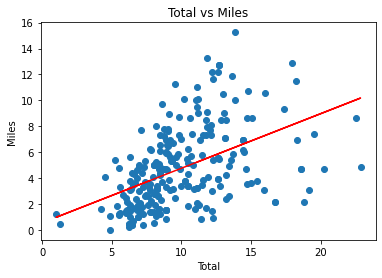

In [32]:
x_axis = grubhubClean["total"]
y_axis = grubhubClean["miles"]

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Total vs Miles")
plt.xlabel("Total")
plt.ylabel("Miles")
plt.show()

The correlation coefficient: 1.0.


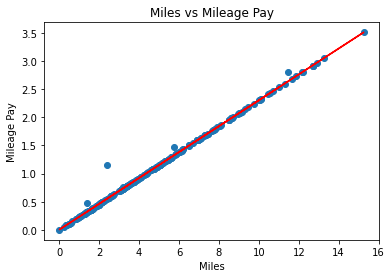

In [33]:
x_axis = grubhubClean['miles']
y_axis = grubhubClean['mileagePay']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Miles vs Mileage Pay")
plt.xlabel("Miles")
plt.ylabel("Mileage Pay")
plt.show()

The correlation coefficient: 0.83.


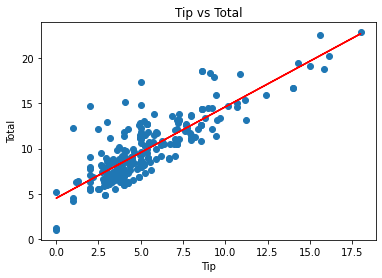

In [34]:
x_axis = grubhubClean['tip']
y_axis = grubhubClean['total']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Tip vs Total")
plt.xlabel("Tip")
plt.ylabel("Total")
plt.show()

The correlation coefficient: 0.51.


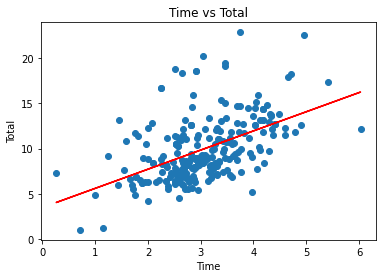

In [35]:
x_axis = grubhubClean['timePay']
y_axis = grubhubClean['total']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Time vs Total")
plt.xlabel("Time")
plt.ylabel("Total")
plt.show()

The correlation coefficient: 0.29.


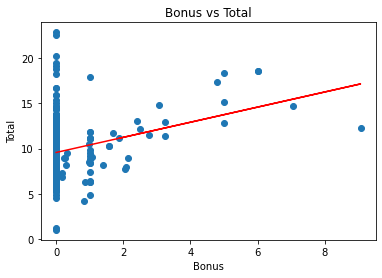

In [36]:
x_axis = grubhubClean['bonus']
y_axis = grubhubClean['total']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Bonus vs Total")
plt.xlabel("Bonus")
plt.ylabel("Total")
plt.show()

In [37]:
# Once More, with grouped means instead

The correlation coefficient: 0.38.


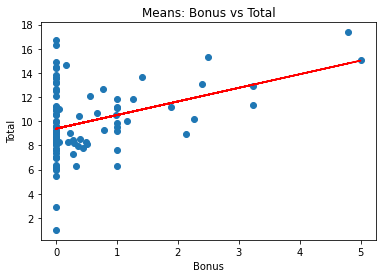

In [38]:
x_axis = groupedMeanDF['bonus']
y_axis = groupedMeanDF['total']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Means: Bonus vs Total")
plt.xlabel("Bonus")
plt.ylabel("Total")
plt.show()

The correlation coefficient: 0.03.


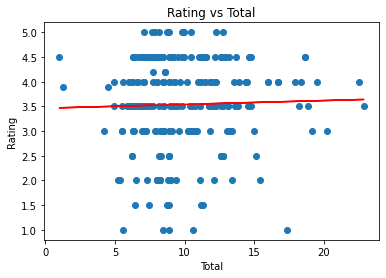

In [40]:
x_axis = grubhubClean['total']
y_axis = grubhubClean['rating']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Rating vs Total")
plt.xlabel("Total")
plt.ylabel("Rating")
plt.show()

The correlation coefficient: 0.05.


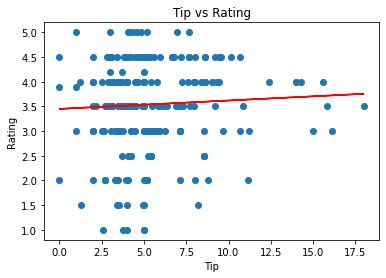

In [41]:
x_axis = grubhubClean['tip']
y_axis = grubhubClean['rating']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Tip vs Rating")
plt.xlabel("Tip")
plt.ylabel("Rating")
plt.show()

The correlation coefficient: -0.09.


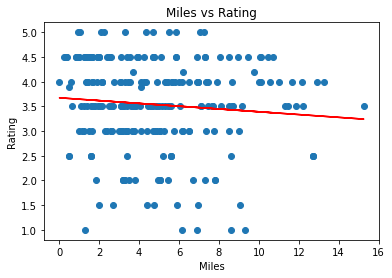

In [42]:
x_axis = grubhubClean['miles']
y_axis = grubhubClean['rating']

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
#plt.annotate(line_equation, (color="red")
corr_coeff_str = "correlation coefficient:" + str(round(correlation_coeff[0],2))
#plt.annotate(corr_coeff_str, (color="red")
#plt.ylim()
plt.title("Miles vs Rating")
plt.xlabel("Miles")
plt.ylabel("Rating")
plt.show()